## Ex 5.5

#### a)

In [33]:
#a) fit a logistic regression model 
require(ISLR)
summary(Default)

 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

In [34]:
#logistic regresion  trained on full data set
glm.fit <- glm(default~income+balance, data=Default, family=binomial)
print(summary(glm.fit))

# we observe that both variables have low p-values


Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8



### b)

In [35]:
#b) use validation apparoach estimate the test erro of this model
#i  lets put code which computes model errror in a funciton 
set.seed(1)

logreg_vsrun_tsterror<-function(Default){
	#make a new random smaple
	tsmpl <- sample(1:nrow(Default), nrow(Default)/2)  #training size is half of the dataset
	train_idx <- 1:nrow(Default) %in% tsmpl

	glm.fit <- glm(default~income+balance, data=Default, family=binomial, subset=train_idx)

	glm.probs<-predict(glm.fit,Default[!train_idx,], type="response")
	glm.pred<-rep("No", length(glm.probs))
	glm.pred[glm.probs > 0.5 ] <- "Yes"
    model_tst_err <- mean(glm.pred != Default[!train_idx,]$default)
    return (model_tst_err)
}
logreg_vsrun_tsterror(Default)

[1] 0.0286

### c)

In [36]:
print(paste("default mode vs run  test error:", logreg_vsrun_tsterror(Default)))
print(paste("default mode vs run  test error:", logreg_vsrun_tsterror(Default)))
print(paste("default mode vs run  test error:", logreg_vsrun_tsterror(Default)))

#we observe that the mean test erro seems to be around 0.026

[1] "default mode vs run  test error: 0.0236"
[1] "default mode vs run  test error: 0.028"
[1] "default mode vs run  test error: 0.0268"


In [37]:
### ADDITIONAL  lets compute mean and standard deviation of the test error 10 times
runlng <- 10
tse <- rep(0,runlng)
for (i in 1:runlng){
	tse[i] <- logreg_vsrun_tsterror(Default)
}
print(paste("lgoreg income+balance mean:", mean(tse), "sd:", sd(tse)))
## we observe the  mean and sdandard devition of the model error rate

[1] "lgoreg income+balance mean: 0.02594 sd: 0.00119275591244255"


### d)

In [38]:
#redifined the function with a changed model
# with student added in  log reg model
logreg_vsrun_tsterror_m1<-function(Default){
	#make a new random smaple
	tsmpl <- sample(1:nrow(Default), nrow(Default)/2)  #training size is half of the dataset
	train_idx <- 1:nrow(Default) %in% tsmpl

	glm.fit <- glm(default~income+balance+student, data=Default, family=binomial, subset=train_idx)

	glm.probs<-predict(glm.fit,Default[!train_idx,], type="response")
	glm.pred<-rep("No", length(glm.probs))
	glm.pred[glm.probs > 0.5 ] <- "Yes"
    model_tst_err <- mean(glm.pred != Default[!train_idx,]$default)
    return (model_tst_err)
}
#running the validation set 1- times
runlng <- 10
tse <- rep(0,runlng)
for (i in 1:runlng){
	tse[i] <- logreg_vsrun_tsterror(Default)
}
print(paste("lgoreg income+balance+student mean:", mean(tse), "sd:", sd(tse)))

## we observe that adding student to the model does not matter. i.e. a new  tst error and standard deviation
# lie  within the previous tst error and standard deviation. 

[1] "lgoreg income+balance+student mean: 0.02558 sd: 0.00172935440747889"


## Ex 6
### a)

In [39]:
glm.fit<-glm(default~income+balance, data=Default, family=binomial)
print(coef(summary(glm.fit)))

                 Estimate   Std. Error    z value      Pr(>|z|)
(Intercept) -1.154047e+01 4.347564e-01 -26.544680 2.958355e-155
income       2.080898e-05 4.985167e-06   4.174178  2.990638e-05
balance      5.647103e-03 2.273731e-04  24.836280 3.638120e-136


### b)

In [40]:
#b)
boot.fn<-function(data,index){
	return ( coef(glm(default~income+balance, data=data, subset=index,family=binomial)) )
}
print(paste("number of observations in the dataset:",nrow(Default)))
#appying a boot.fn  function on a original dataset index
print(paste("coefs:",boot.fn(Default, 1:nrow(Default))))

[1] "number of observations in the dataset: 10000"
[1] "coefs: -11.5404684366776"    "coefs: 2.08089755005988e-05"
[3] "coefs: 0.00564710294333903" 


### c)

In [41]:
require(boot)
set.seed(1)
print(paste("applying bootstrap to for log reg model coefficients 50 times",
            "number of obs in dataset:", nrow(Default) ))

print(boot(Default,boot.fn,R=50))



[1] "applying bootstrap to for log reg model coefficients 50 times number of obs in dataset: 10000"

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 50)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01  1.181200e-01 4.202402e-01
t2*  2.080898e-05 -5.466926e-08 4.542214e-06
t3*  5.647103e-03 -6.974834e-05 2.282819e-04


### d)

We can observe that standard error estimated by glm and by bootstrap  are similar

## Ex 5.7

In [42]:
require(ISLR)
str(Weekly)
set.seed(1)

'data.frame':	1089 obs. of  9 variables:
 $ Year     : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ Lag1     : num  0.816 -0.27 -2.576 3.514 0.712 ...
 $ Lag2     : num  1.572 0.816 -0.27 -2.576 3.514 ...
 $ Lag3     : num  -3.936 1.572 0.816 -0.27 -2.576 ...
 $ Lag4     : num  -0.229 -3.936 1.572 0.816 -0.27 ...
 $ Lag5     : num  -3.484 -0.229 -3.936 1.572 0.816 ...
 $ Volume   : num  0.155 0.149 0.16 0.162 0.154 ...
 $ Today    : num  -0.27 -2.576 3.514 0.712 1.178 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 1 1 2 2 2 1 2 2 2 1 ...


### a)

In [43]:
glm.fit<-glm(Direction~Lag1+Lag2, data=Weekly, family=binomial)

### b)

In [44]:
#log reg with all but the first obs
glm.fit<-glm(Direction~Lag1+Lag2, data=Weekly[-1,], family=binomial)

### c)

In [47]:
glm.probs <- predict(glm.fit, Weekly[1,], type="response")
glm.pred <- rep("Down",length(glm.probs))
glm.pred[glm.probs > 0.5] <- "Up"
print(paste("prediction fist observation of Weekly set:", glm.pred))
print("first observation of dataset")
print(Weekly[1,])
#we see the prediction is wrong

[1] "prediction fist observation of Weekly set: Up"
[1] "first observation of dataset"
  Year  Lag1  Lag2   Lag3   Lag4   Lag5   Volume Today Direction
1 1990 0.816 1.572 -3.936 -0.229 -3.484 0.154976 -0.27      Down


### d)

In [48]:
lng <- nrow(Weekly)
#lng <- 10  #for debugging
iscorrect<-rep(0,lng)
for (i in 1:lng) {
	glm.fit<-glm(Direction~Lag1+Lag2, data=Weekly[-i,], family=binomial)
	glm.prob <- predict(glm.fit, Weekly[i,], type="response")
	glm.pred <- ifelse( glm.prob > 0.5, "Up", "Down")
	iscorrect[i] <- ifelse (glm.pred == Weekly[i,]$Direction, 1, 0 )
}


### e)

In [49]:
print(paste("loocv by for estimate:",mean(iscorrect)))

[1] "loocv by for estimate: 0.550045913682277"


## Ex 5.8

### a)

In [50]:
nobs<-100

x<-rnorm(nobs)
y<-x-2*x^2+rnorm(100)

n=100 ; p=2

$Y = f(X) = X - 2 X^2 + \epsilon$

### b)

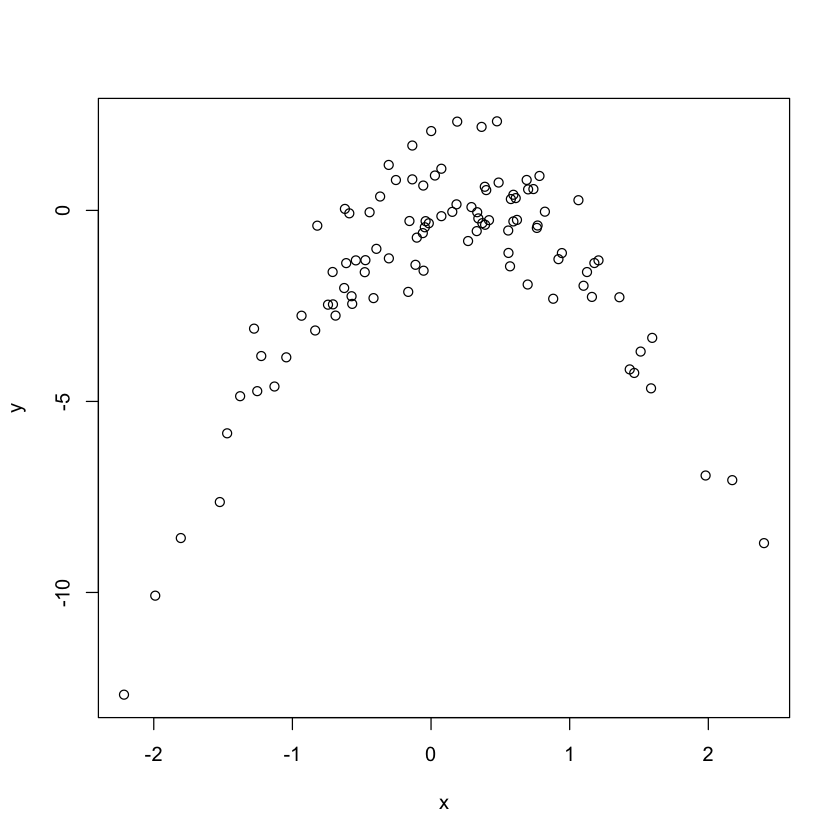

In [51]:
plot(x,y)

### c)

In [53]:
require(boot)
set.seed(1)
dataset <- data.frame(x,y)


for (i in (1:4)){
	glm.fit<-glm(y~poly(x,i),data=dataset)
	cv.err<-cv.glm(dataset,glm.fit)
	print(paste("linear regression model degree",i,"loocv error:",cv.err$delta[1]))
}


[1] "linear regression model degree 1 loocv error: 7.28816160667281"
[1] "linear regression model degree 2 loocv error: 0.937423637615552"
[1] "linear regression model degree 3 loocv error: 0.956621830108939"
[1] "linear regression model degree 4 loocv error: 0.953904892744803"


### d)

In [54]:
set.seed(10)
dataset <- data.frame(x,y)


for (i in (1:4)){
	glm.fit<-glm(y~poly(x,i),data=dataset)
	cv.err<-cv.glm(dataset,glm.fit)
	print(paste("linear regression model degree",i,"loocv error:",cv.err$delta[1]))
}



[1] "linear regression model degree 1 loocv error: 7.28816160667281"
[1] "linear regression model degree 2 loocv error: 0.937423637615552"
[1] "linear regression model degree 3 loocv error: 0.95662183010894"
[1] "linear regression model degree 4 loocv error: 0.953904892744804"


We observe that loocv result are the same independent of the seed. Loocv evalautes n folds of a single observation

### e)

The polinomial model with degree 2 has the lowest loocv error

### f)

In [55]:
print( summary(glm(y~poly(x,4),data=dataset)))


Call:
glm(formula = y ~ poly(x, 4), data = dataset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2



We observe that p-values are significant only up to degree 2 of the  x. This agrees with loocv result.

## Ex 5.9
### a)

In [1]:
#Boston data set 
require(MASS)
#a)
mu <- mean(Boston$medv)
print(paste("medv mu estimate:",mu))

Loading required package: MASS


[1] "medv mu estimate: 22.5328063241107"


### b)

In [2]:
mu_stderr <- sd(Boston$medv) / sqrt(nrow(Boston))
print(paste("1 estimate of medv std error:",mu_stderr))

[1] "1 estimate of medv std error: 0.408861147497535"


### c)

In [5]:
require(boot)
medv_mu.fn <-function(data,index){
	medv_mu <- mean(data[index,]$medv) 
	return(medv_mu)
}
#print(  medv_mu.fn(Boston, 1:nrow(Boston)) )

btstrap <- boot(Boston,medv_mu.fn,1000)
print(btstrap)

#we observe that standard error of medv mean is close  to the previous estimate


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston, statistic = medv_mu.fn, R = 1000)


Bootstrap Statistics :
    original      bias    std. error
t1* 22.53281 0.002281423   0.4016148


### e)

In [6]:
med <- median(Boston$medv)
print(paste("median estimate:",med))

[1] "median estimate: 21.2"


### f)

In [8]:
medv_median.fn <-function(data,index){
	med <- median(data[index,]$medv) 
	return(med)
}
#print(  medv_median.fn(Boston, 1:nrow(Boston)) ) #for debugging

btstrap <- boot(Boston,medv_median.fn,1000)
print("median medv by bootstrap")
print(btstrap)

# we observe that standard error of median is similar of that of the mean
# standard erro is small relativ to the median estimate

[1] "median medv by bootstrap"

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston, statistic = medv_median.fn, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*     21.2  0.0041   0.3811344


### g)

In [9]:
mu_01<-quantile(Boston$medv, 0.1)
print(paste("10% quantile of medv:",mu_01))

[1] "10% quantile of medv: 12.75"


### h)

In [10]:
medv_quant10.fn <-function(data,index){
	qmu <- quantile( data[index,]$medv, c(0.1) ) 
	return(qmu)
}
#print(  medv_quant10.fn(Boston, 1:nrow(Boston)) ) #for debugging

btstrap <- boot(Boston,medv_quant10.fn,1000)
print("10% quantile of medv by bootstrap")
print(btstrap)

#we obsert the estmate by the boostrap mathes the sample 10% quantile.  
#the standard error of the 10% quantile is of the same order of magnitude compared to stderr of mean, meddian
# the standard error is small relative to the estimate of 10% quantile


[1] "10% quantile of medv by bootstrap"

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston, statistic = medv_quant10.fn, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*    12.75  0.0197   0.5027521
